# Solar cell background analysis with box  - run 2021-07-19

The goal of this notebook is to check the disapperance of the background signal (inparticular around 850 nm) when adding a black box above the laser.

In [1]:
import os, sys
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.io import fits
from astropy import constants as const

from solarcell_dataset import (SolarCellDataSet, SolarCellRun, calculate_npulses, 
                               get_info_from_filename, get_photodiode_total_charge, get_solarcell_total_charge, estimate_noise)
%matplotlib notebook

/home/jneveu/stardice/analysis/cbp_paper


## With the black box

In [2]:
datapath="/data/STARDICE/cbp/solarcell/ut20210719"
%ls {datapath}/*.npy

/data/STARDICE/cbp/solarcell/ut20210719/QSWMax_EMPTY_Angle_0_ntuple.npy
/data/STARDICE/cbp/solarcell/ut20210719/QSWMax_EMPTY_Angle_0_ntuple_old20210725.npy
/data/STARDICE/cbp/solarcell/ut20210719/QSWMax_EMPTY_Angle_Bas_ntuple.npy
/data/STARDICE/cbp/solarcell/ut20210719/QSWMax_EMPTY_Angle_Haut_ntuple.npy
/data/STARDICE/cbp/solarcell/ut20210719/QSWMax_EMPTY_TestBox_ntuple.npy


In [3]:
run = SolarCellRun(directory_path=datapath, tag="TestBox", nbursts=5)
run.load_from_file("/data/STARDICE/cbp/solarcell/ut20210719/QSWMax_EMPTY_TestBox_ntuple.npy")

<IPython.core.display.Javascript object>


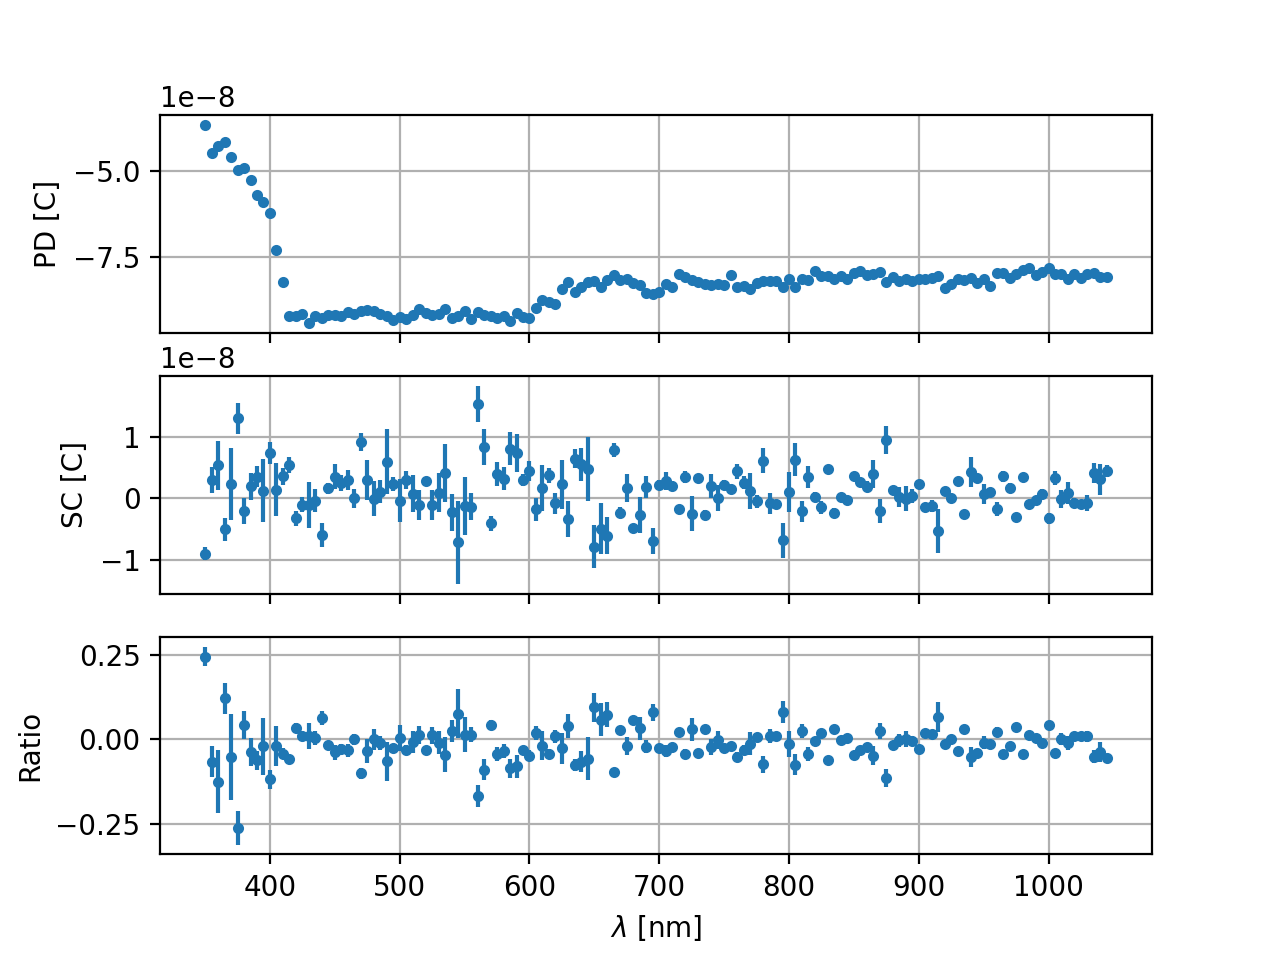

/home/jneveu/stardice/analysis/cbp_paper/solarcell_dataset.py:700: RuntimeWarning: invalid value encountered in true_divide
  ratio_err = ratio * np.sqrt((self.data["sc_charge_total_err"] / self.data["sc_charge_total"]) ** 2


In [4]:
run.plot_summary()

### Checks

In [5]:
run.load()
run.load_from_file("/data/STARDICE/cbp/solarcell/ut20210719/QSWMax_EMPTY_TestBox_ntuple.npy")

100%|██████████| 140/140 [00:15<00:00,  9.11it/s]


<IPython.core.display.Javascript object>


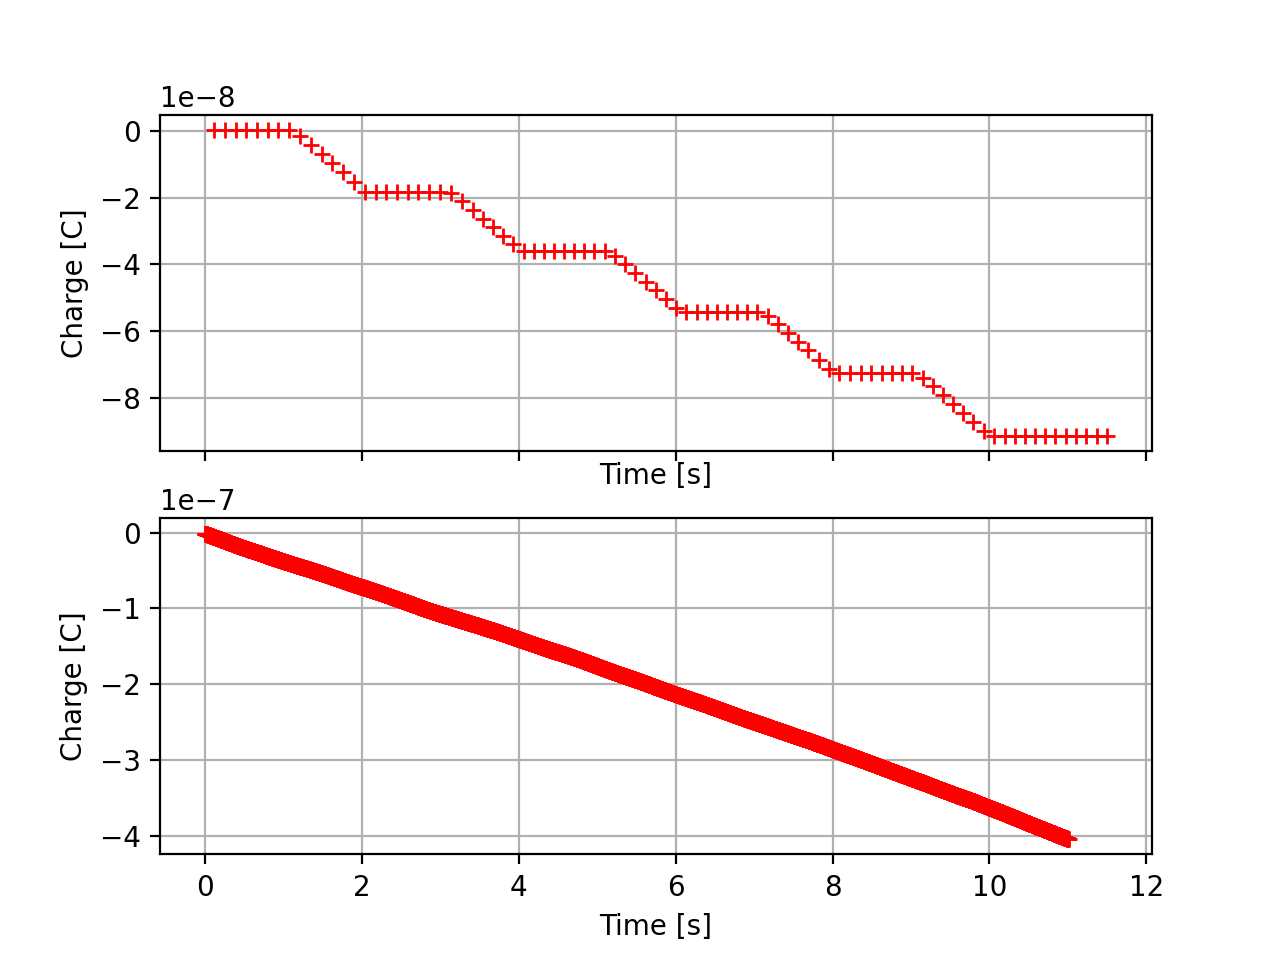

In [6]:
d = run.get_data_set(590, 5)
d.plot_data_set()

<IPython.core.display.Javascript object>


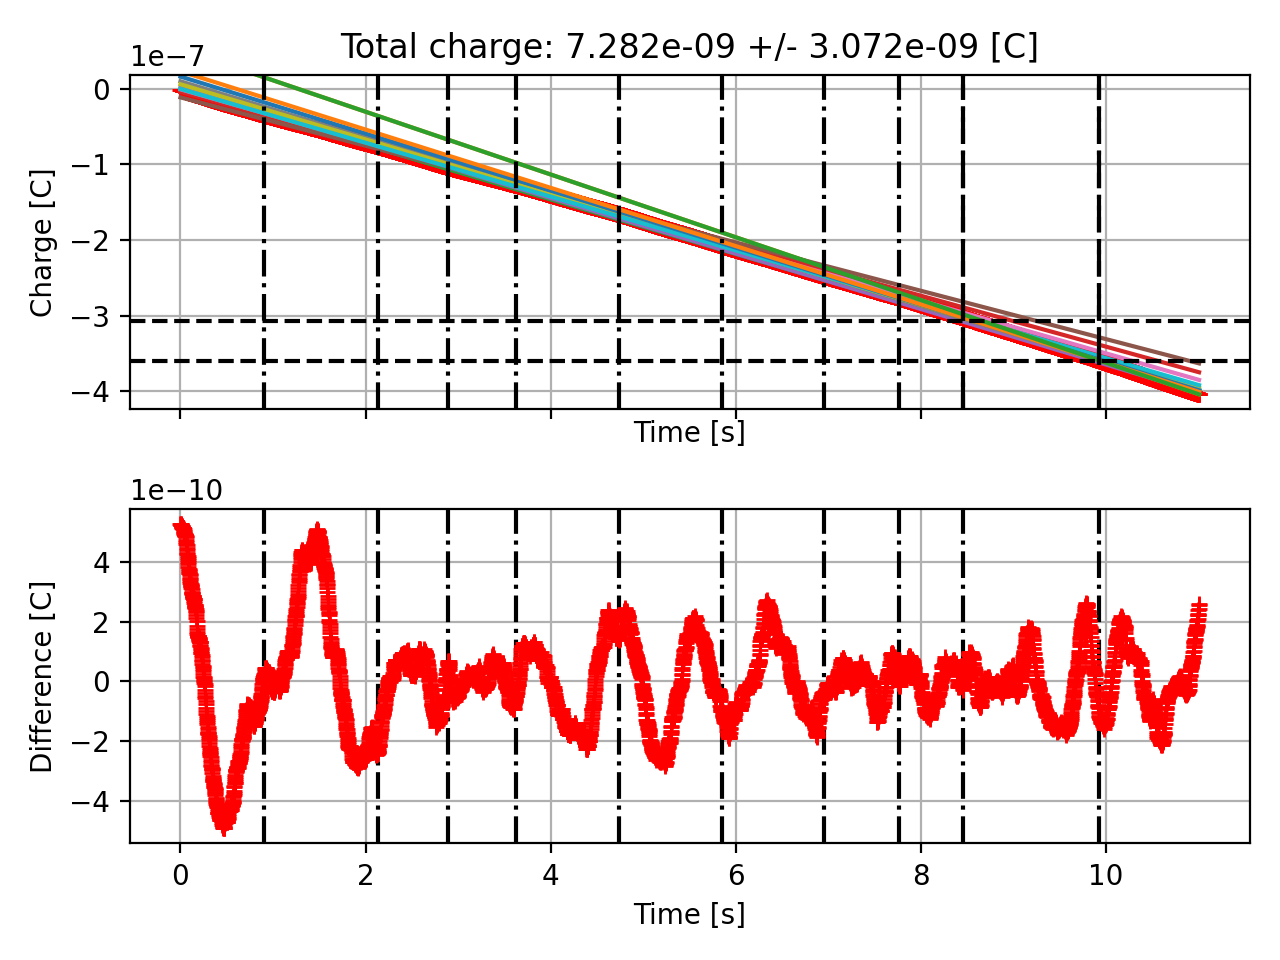

In [7]:
noise = estimate_noise(d.sc.data["time"], d.sc.data["charge"])
err = noise * np.ones_like(d.sc.data["time"])
charge_sc, charge_sc_err, i_k1, i_k2, pvals_sc, indices_sc = get_solarcell_total_charge(
    d.sc.data["time"],
    d.sc.data["charge"], d.get_time_breaks(),
    err=err, plot=True)


The "dark current" is so curved that a new straight line is fitted at the very end of the $q(t)$ curve that  creates a non zero charge in the summary plot.

<IPython.core.display.Javascript object>


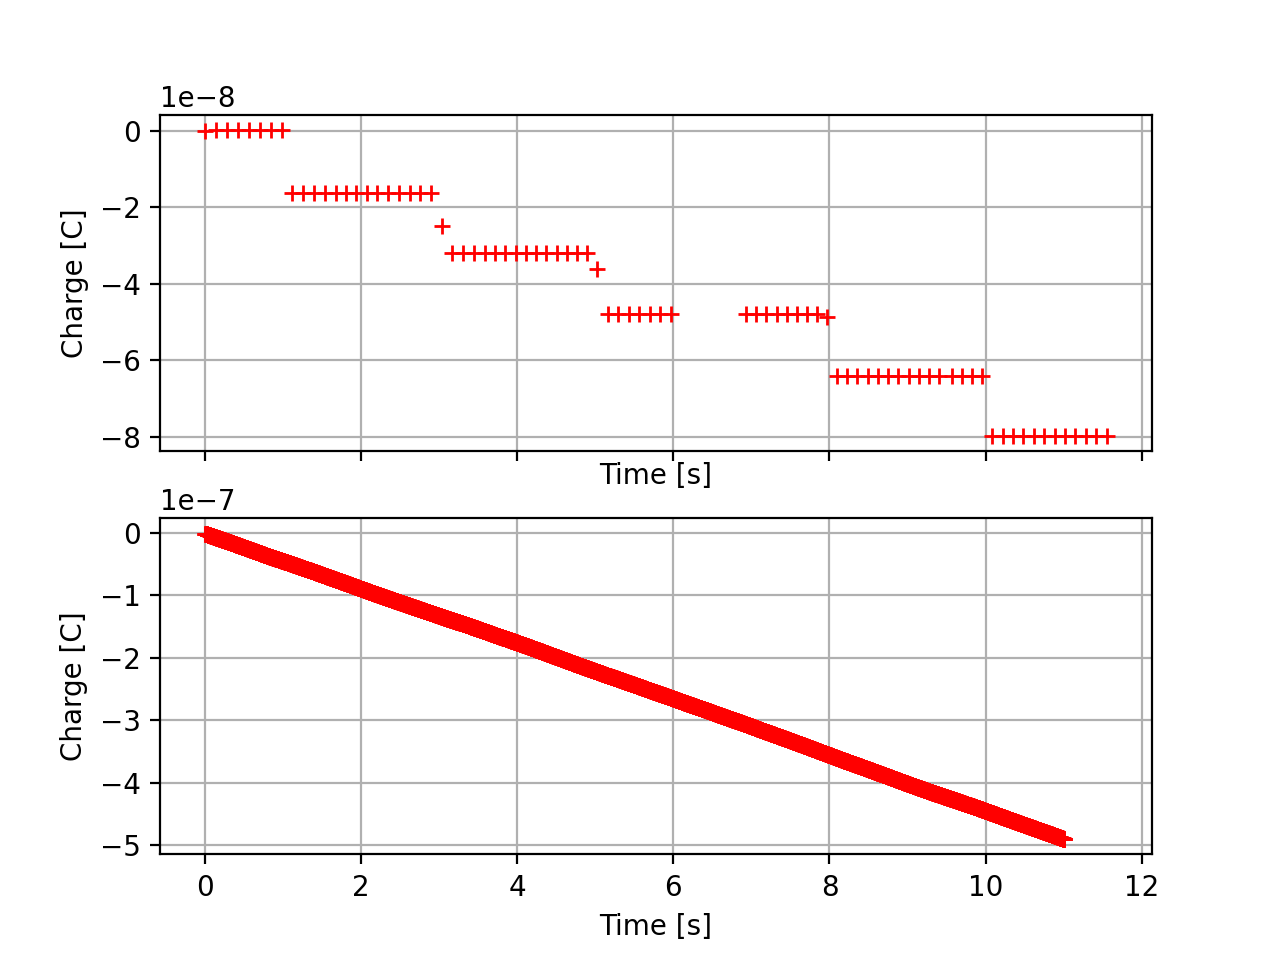

In [8]:
d = run.get_data_set(850, 5)
d.plot_data_set()

Even after a zoom, no signal is visible in the solar cell $q(t)$ curve at 850nm.

## Without the black box

In [9]:
datapath="/data/STARDICE/cbp/solarcell/ut20210713/CBPOffTarget"
%ls {datapath}/*.npy

/data/STARDICE/cbp/solarcell/ut20210713/CBPOffTarget/QSWMax_EMPTY_5mmPin3_AmbLight_ntuple.npy
/data/STARDICE/cbp/solarcell/ut20210713/CBPOffTarget/QSWMax_EMPTY_5mmPin3_AmbLight_ntuple_old20210725.npy


In [10]:
run = SolarCellRun(directory_path=datapath, tag="5mmPin3_AmbLight", nbursts=5)
run.load_from_file("/data/STARDICE/cbp/solarcell/ut20210713/CBPOffTarget/QSWMax_EMPTY_5mmPin3_AmbLight_ntuple.npy")

<IPython.core.display.Javascript object>


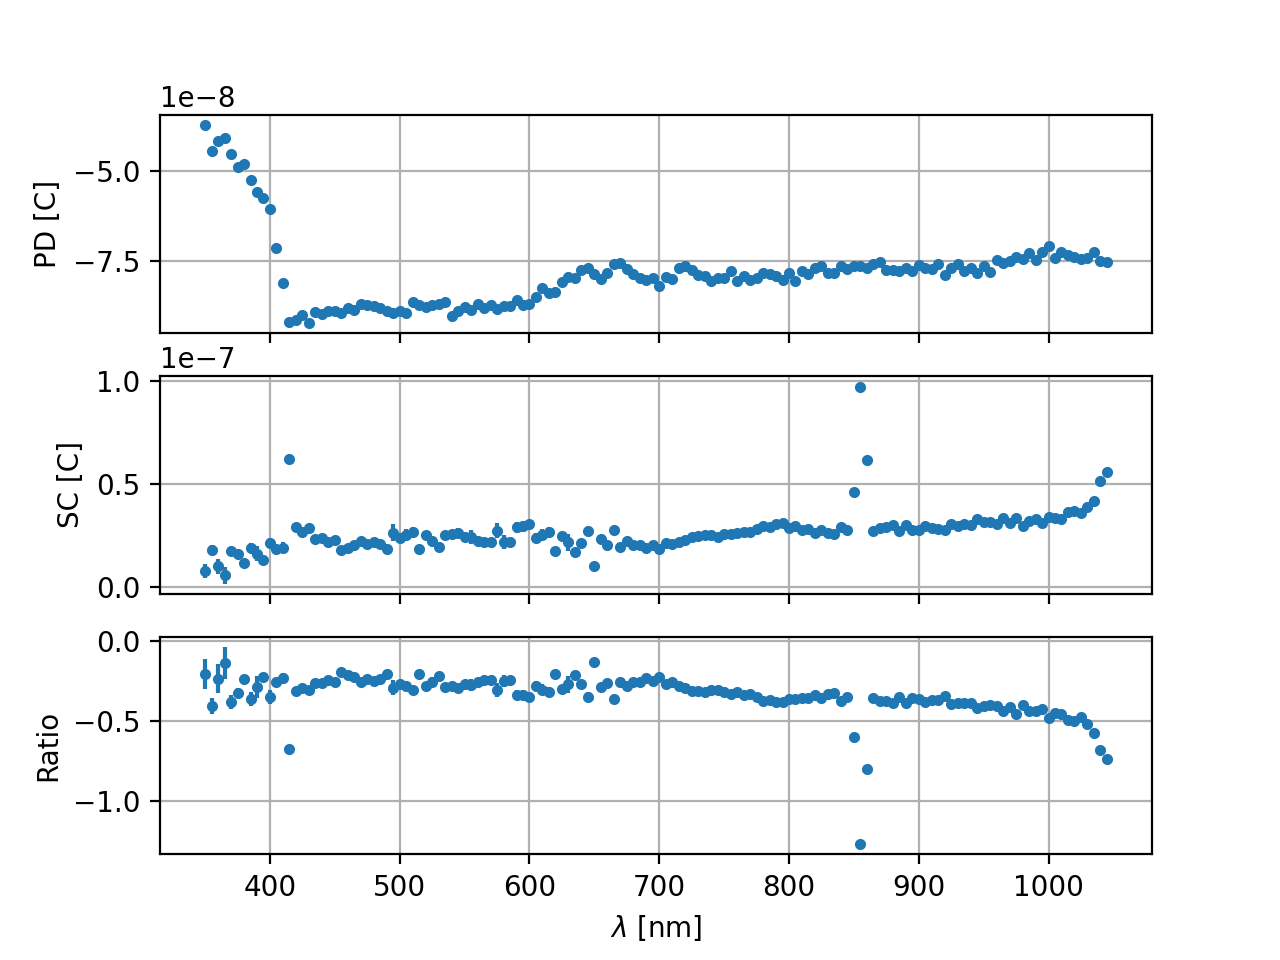

In [11]:
run.plot_summary()

<IPython.core.display.Javascript object>


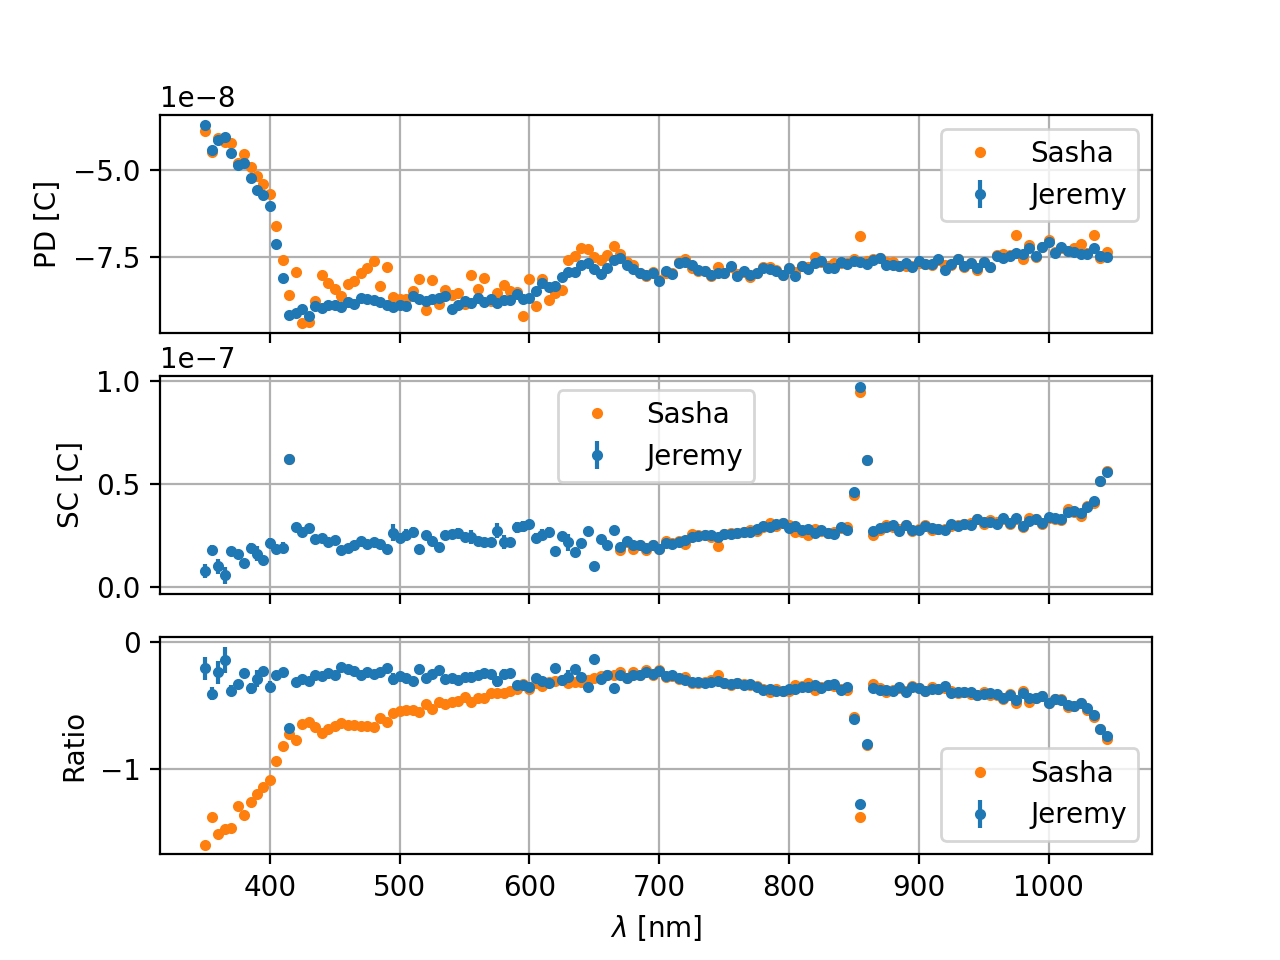

In [12]:
nt = run.data
csv = np.loadtxt(os.path.join(datapath, "QSWMax_5mmPin_OffTargetSC_charges.csv"), skiprows=1, delimiter=",")
wl1 = csv.T[0]
charge_sc = 5*csv.T[1] * const.e.value * 1e6
csv = np.loadtxt(os.path.join(datapath, "QSWMax_5mmPin_OffTargetPD_charges.csv"), skiprows=1, delimiter=",")
wl2 = csv.T[0]
charge_pd = -5*csv.T[1] * const.e.value * 1e6

fig, ax = plt.subplots(3, 1, sharex="all")
ax[0].errorbar(nt["set_wl"], nt["pd_charge_total"], yerr=nt["pd_charge_total_err"], linestyle="none",
               markersize=3, marker="o", label="Jeremy")
ax[0].plot(wl2, charge_pd, "o", markersize=3, label="Sasha")
ax[1].errorbar(nt["set_wl"], nt["sc_charge_total"], yerr=nt["sc_charge_total_err"], linestyle="none",
               markersize=3, marker="o", label="Jeremy")
ax[1].plot(wl1, charge_sc, "o", markersize=3, label="Sasha")
ratio = nt["sc_charge_total"] / nt["pd_charge_total"]
ratio_err = ratio * np.sqrt((nt["sc_charge_total_err"] / nt["sc_charge_total"]) ** 2
                                      + (nt["pd_charge_total_err"] / nt["pd_charge_total"]) ** 2)
ax[2].errorbar(nt["set_wl"], ratio, yerr=ratio_err, linestyle="none",
               markersize=3, marker="o", label="Jeremy")
ax[2].plot(wl2, np.interp(wl2, wl1, charge_sc) / charge_pd, "o", markersize=3, label="Sasha")
for i in range(3):
    ax[i].legend()
    ax[i].grid()
ax[0].set_ylabel("PD [C]")
ax[1].set_ylabel("SC [C]")
ax[2].set_ylabel("Ratio")
ax[2].set_xlabel(r"$\lambda$ [nm]")
plt.show()


### Checks

In [13]:
run.load()

100%|██████████| 140/140 [00:14<00:00,  9.49it/s]


<IPython.core.display.Javascript object>


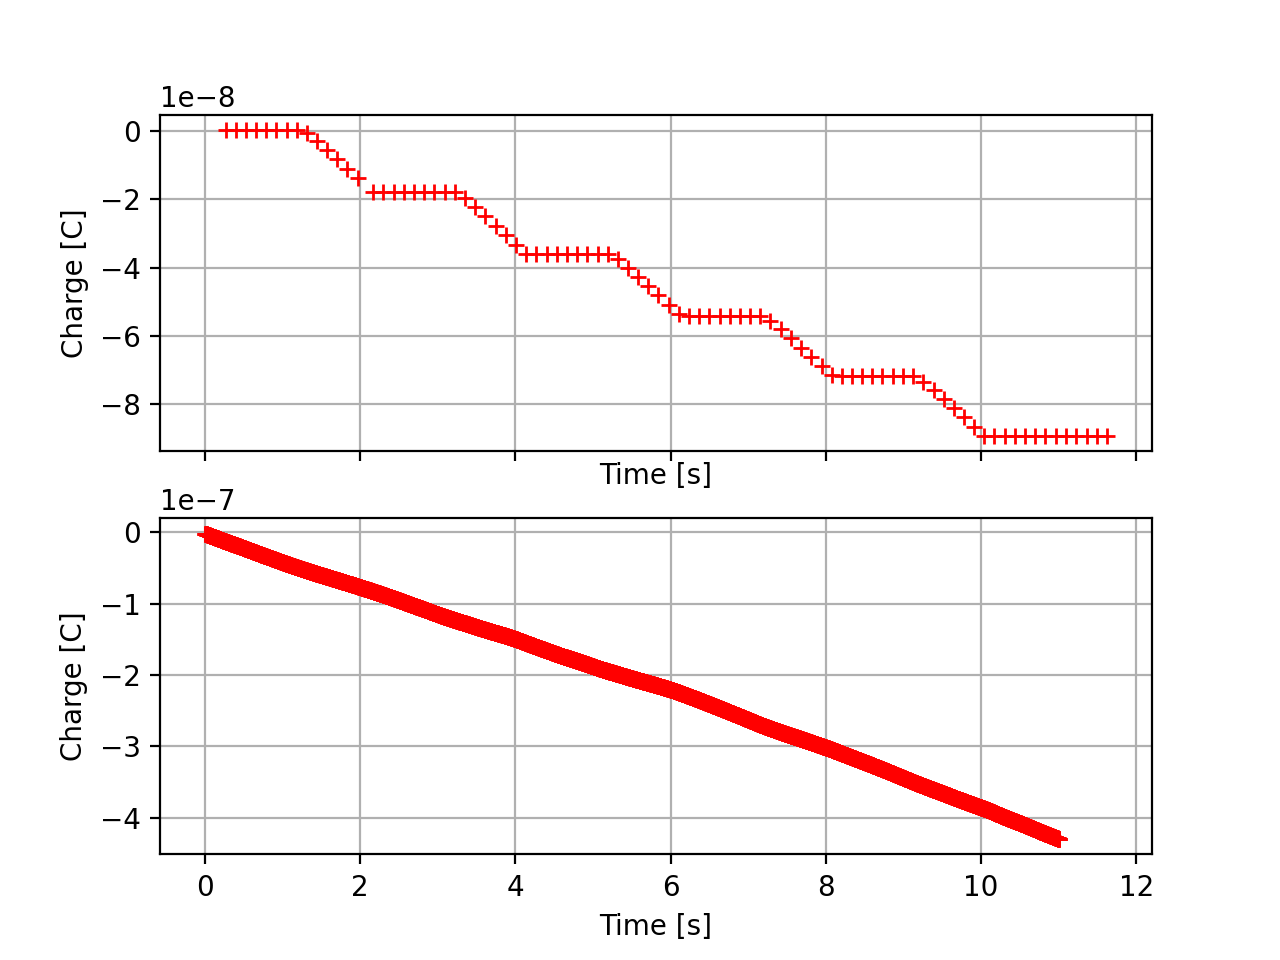

In [14]:
d = run.get_data_set(505, 5)
d.plot_data_set()

<IPython.core.display.Javascript object>


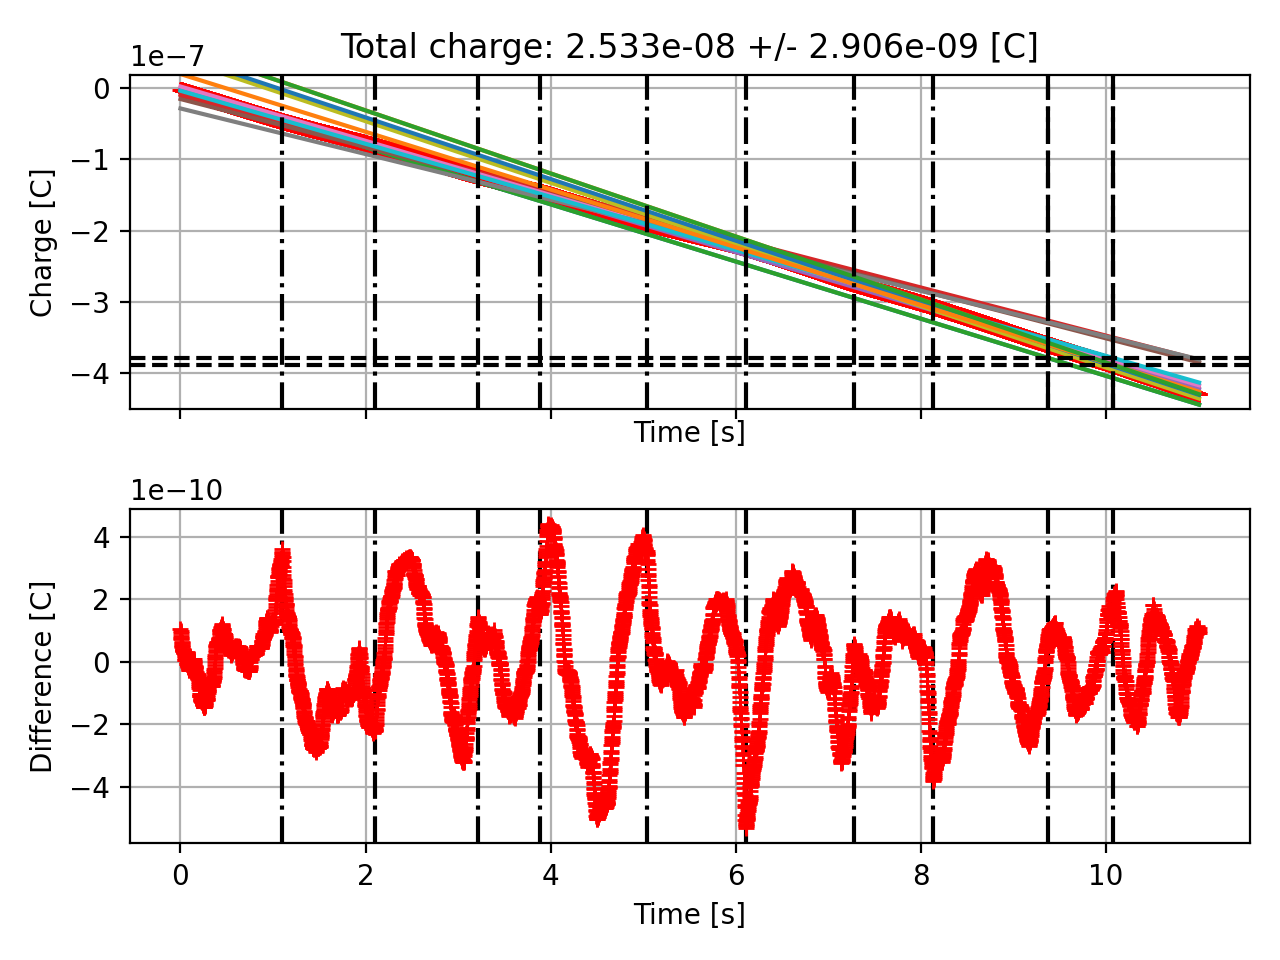

In [15]:
noise = estimate_noise(d.sc.data["time"], d.sc.data["charge"])
err = noise * np.ones_like(d.sc.data["time"])
charge_sc, charge_sc_err, i_k1, i_k2, pvals_sc, indices_sc = get_solarcell_total_charge(
    d.sc.data["time"],
    d.sc.data["charge"], d.get_time_breaks(),
    err=err, plot=True)
